# DS - Proj 4 -**House Price Prediction**

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [49]:
df = pd.read_csv('house_prices.csv')
df

,Property_ID,Area,Bedrooms,Bathrooms,Age,Location,Property_Type,Price
0,PROP0001,3712,4,3,36,Rural,House,22260000
1,PROP0002,1591,4,1,35,Suburb,House,16057500
2,PROP0003,1646,4,3,20,Rural,Villa,12730000
3,PROP0004,4814,1,2,13,City Center,Villa,50840000
4,PROP0005,800,4,2,38,Suburb,Apartment,10650000
...,...,...,...,...,...,...,...,...
295,PROP0296,1450,4,1,0,Suburb,Villa,17625000
296,PROP0297,3866,1,2,16,City Center,Apartment,41060000
297,PROP0298,1970,3,1,6,Rural,Apartment,13050000
298,PROP0299,4243,3,2,7,Rural,Villa,24865000


In [50]:
df.isna().sum() #____ no null values____

,0
Property_ID,0
Area,0
Bedrooms,0
Bathrooms,0
Age,0
Location,0
Property_Type,0
Price,0


<Axes: >

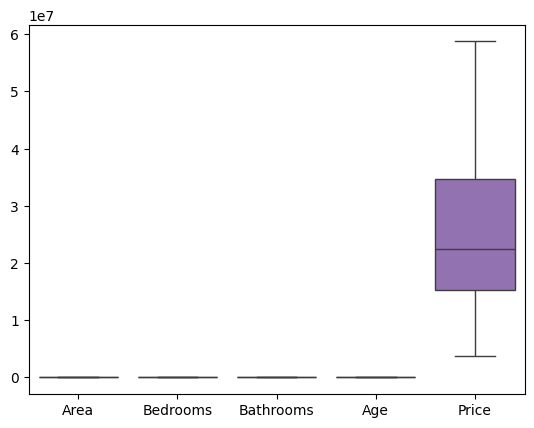

In [51]:
import seaborn as sns
sns.boxplot(data = df) #------no ouliers-----

In [52]:
df['Property_Type'].unique()

array(['House', 'Villa', 'Apartment'], dtype=object)

In [53]:
df['Property_Type'] = df['Property_Type'].map({'House': 0, 'Villa': 1, 'Apartment': 2})
df


,Property_ID,Area,Bedrooms,Bathrooms,Age,Location,Property_Type,Price
0,PROP0001,3712,4,3,36,Rural,0,22260000
1,PROP0002,1591,4,1,35,Suburb,0,16057500
2,PROP0003,1646,4,3,20,Rural,1,12730000
3,PROP0004,4814,1,2,13,City Center,1,50840000
4,PROP0005,800,4,2,38,Suburb,2,10650000
...,...,...,...,...,...,...,...,...
295,PROP0296,1450,4,1,0,Suburb,1,17625000
296,PROP0297,3866,1,2,16,City Center,2,41060000
297,PROP0298,1970,3,1,6,Rural,2,13050000
298,PROP0299,4243,3,2,7,Rural,1,24865000


In [54]:
df['Location'].unique()

array(['Rural', 'Suburb', 'City Center'], dtype=object)

In [55]:
df["Location"] = df['Location'].map({'Rural' :0,  'Suburb' :1, 'City Center': 2})
df

,Property_ID,Area,Bedrooms,Bathrooms,Age,Location,Property_Type,Price
0,PROP0001,3712,4,3,36,0,0,22260000
1,PROP0002,1591,4,1,35,1,0,16057500
2,PROP0003,1646,4,3,20,0,1,12730000
3,PROP0004,4814,1,2,13,2,1,50840000
4,PROP0005,800,4,2,38,1,2,10650000
...,...,...,...,...,...,...,...,...
295,PROP0296,1450,4,1,0,1,1,17625000
296,PROP0297,3866,1,2,16,2,2,41060000
297,PROP0298,1970,3,1,6,0,2,13050000
298,PROP0299,4243,3,2,7,0,1,24865000


# Linear Regression

In [75]:
X = df.drop(['Property_ID', 'Price'], axis = 1)
y = df["Price"]

In [76]:
# apply train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [59]:
#Linear Regession
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred = model.predict(X_test)

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [78]:
y_pred = rf.predict(X_test)

#Prediction

In [70]:
y_pred

array([ 8517725., 17979175., 53861700., 24799325., 21485500., 31674325.,
       18849050., 40922750., 24792050., 30152700., 32034225., 38427750.,
       21704575., 10629075., 51520700., 34789075., 11684100., 44523550.,
       13431675.,  9403000., 23007675., 29900475., 18930200., 22351025.,
       36658150., 22696175., 20582475., 17576300., 35569100., 37057700.,
       31865850., 19601575.,  8798475., 19511475., 35005350., 14373600.,
       42500900., 17938600., 18690600., 30558250.,  9329000., 22350875.,
       54345000., 25147150., 18902100., 26236100., 13466525., 36959950.,
       38473625., 16883100., 19579725.,  9978850., 11200675., 14751275.,
       13134000., 17750700., 44415950., 18444450., 10756800.,  8501775.])

# Accuracy - 99%

In [66]:
from sklearn.metrics import r2_score
r = r2_score(y_test, y_pred)
print(r)

0.999796187801116
